In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Set display options to show all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#Linear regression models import
from sklearn.linear_model import LinearRegression

# to split the data
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# targert variable as mpg as the mpg comaprsion/distribution with other attributes

In [4]:
df.shape

(398, 9)

In [5]:
df["displacement"]

0      307.0
1      350.0
2      318.0
3      304.0
4      302.0
5      429.0
6      454.0
7      440.0
8      455.0
9      390.0
10     383.0
11     340.0
12     400.0
13     455.0
14     113.0
15     198.0
16     199.0
17     200.0
18      97.0
19      97.0
20     110.0
21     107.0
22     104.0
23     121.0
24     199.0
25     360.0
26     307.0
27     318.0
28     304.0
29      97.0
30     140.0
31     113.0
32      98.0
33     232.0
34     225.0
35     250.0
36     250.0
37     232.0
38     350.0
39     400.0
40     351.0
41     318.0
42     383.0
43     400.0
44     400.0
45     258.0
46     140.0
47     250.0
48     250.0
49     122.0
50     116.0
51      79.0
52      88.0
53      71.0
54      72.0
55      97.0
56      91.0
57     113.0
58      97.5
59      97.0
60     140.0
61     122.0
62     350.0
63     400.0
64     318.0
65     351.0
66     304.0
67     429.0
68     350.0
69     350.0
70     400.0
71      70.0
72     304.0
73     307.0
74     302.0
75     318.0
76     121.0

In [6]:
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [7]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [8]:
df['horsepower']

0      130
1      165
2      150
3      150
4      140
5      198
6      220
7      215
8      225
9      190
10     170
11     160
12     150
13     225
14      95
15      95
16      97
17      85
18      88
19      46
20      87
21      90
22      95
23     113
24      90
25     215
26     200
27     210
28     193
29      88
30      90
31      95
32       ?
33     100
34     105
35     100
36      88
37     100
38     165
39     175
40     153
41     150
42     180
43     170
44     175
45     110
46      72
47     100
48      88
49      86
50      90
51      70
52      76
53      65
54      69
55      60
56      70
57      95
58      80
59      54
60      90
61      86
62     165
63     175
64     150
65     153
66     150
67     208
68     155
69     160
70     190
71      97
72     150
73     130
74     140
75     150
76     112
77      76
78      87
79      69
80      86
81      92
82      97
83      80
84      88
85     175
86     150
87     145
88     137
89     150
90     198

In [9]:
df[df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [10]:
df['origin'].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [11]:
df['car name'].nunique()

305

In [12]:
df.drop(columns=['car name'], inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [13]:
replace_origin_values = {1: 'America', 2: 'Europe', 3: 'Asia'}
df['origin'] = df['origin'].replace(replace_origin_values)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,America
1,15.0,8,350.0,165,3693,11.5,70,America
2,18.0,8,318.0,150,3436,11.0,70,America
3,16.0,8,304.0,150,3433,12.0,70,America
4,17.0,8,302.0,140,3449,10.5,70,America


In [14]:
df['origin'].nunique()

3

In [15]:
df["horsepower"] = df["horsepower"].replace("?", np.nan)
df["horsepower"] = df["horsepower"].astype('float')
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [16]:
hp_median = df["horsepower"].median()
hp_median

93.5

In [17]:
df["horsepower"] = df["horsepower"].replace(np.nan, hp_median)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [18]:
numeric_columns = df.select_dtypes(include='number')

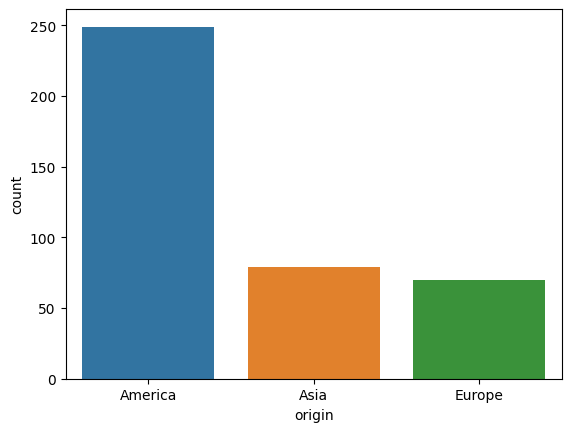

In [19]:
sns.countplot(x="origin", data=df)
plt.show()

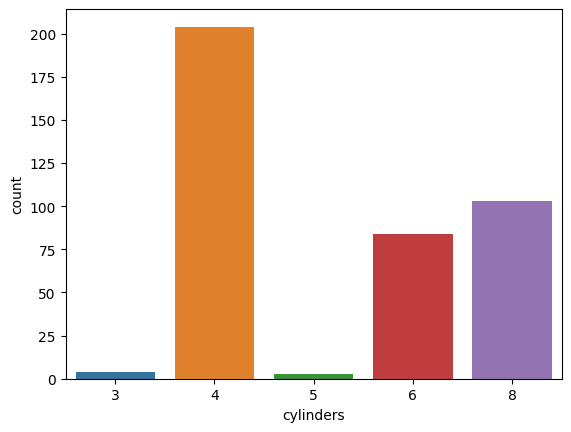

In [20]:
sns.countplot(x="cylinders", data=df)
plt.show()

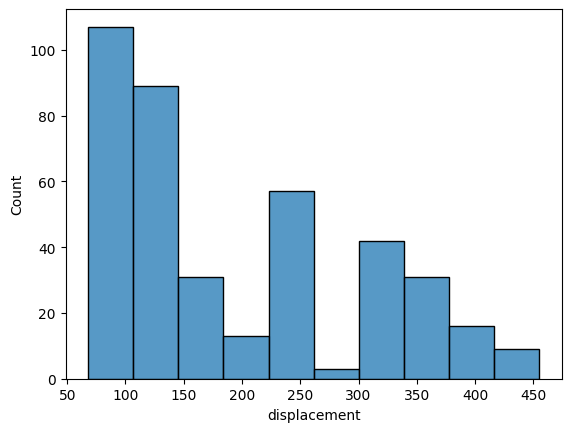

In [21]:
sns.histplot(x="displacement", data=df, bins=10)
plt.show()

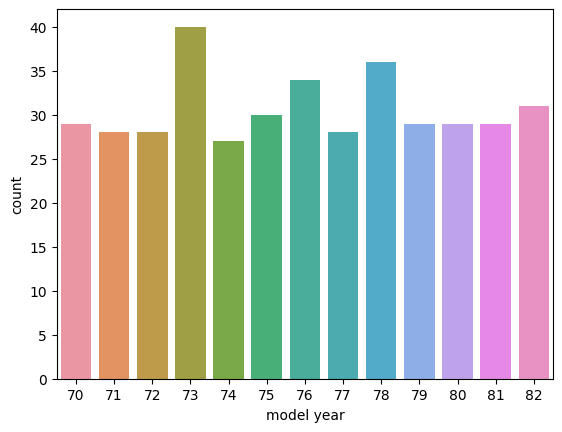

In [22]:
sns.countplot(x="model year", data=df)
plt.show()

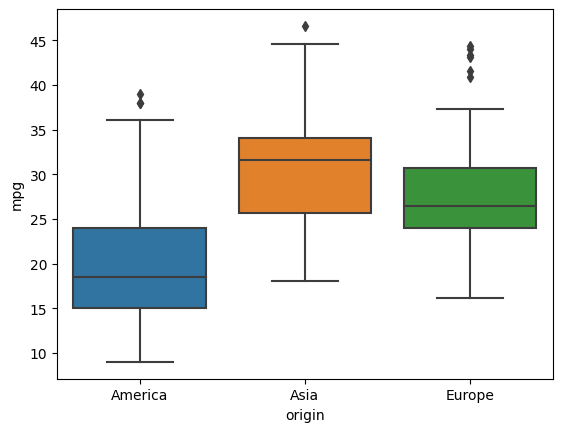

In [23]:
# sns.boxplot(x="origin", hue="mpg", data=df, bins=10)
sns.boxplot(x="origin", y="mpg", data=df)

plt.show()

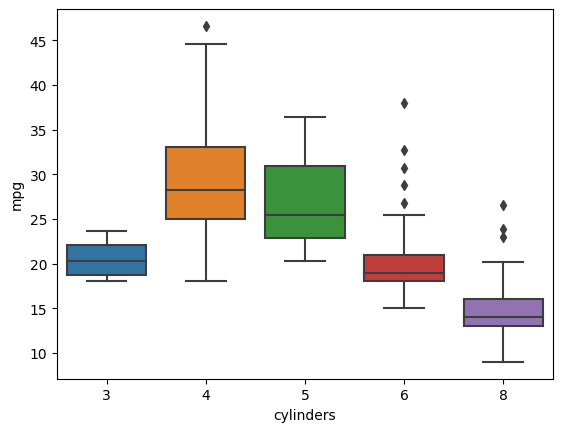

In [24]:
sns.boxplot(x="cylinders", y="mpg", data=df)

plt.show()

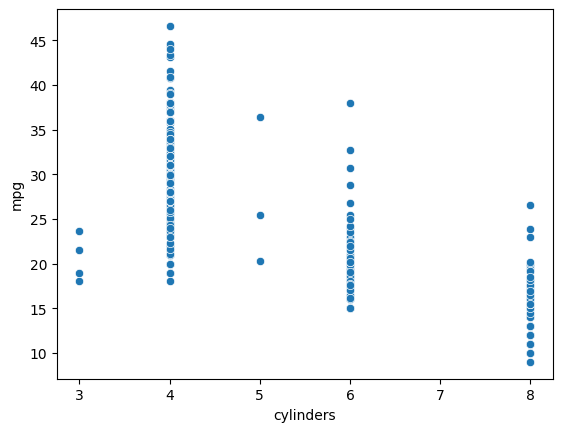

In [25]:
sns.scatterplot(x='cylinders', y='mpg', data=df)
plt.show()


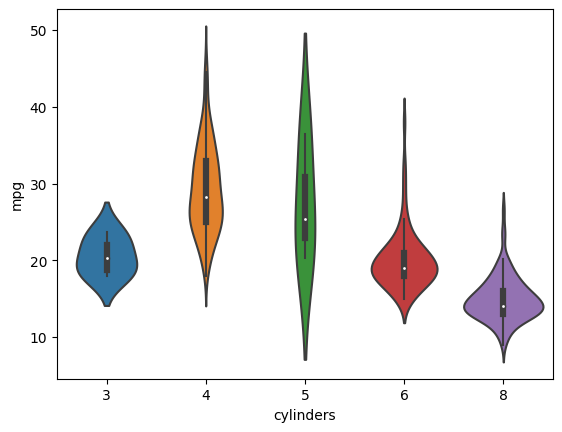

In [26]:
sns.violinplot(x='cylinders', y='mpg', data=df)
plt.show()


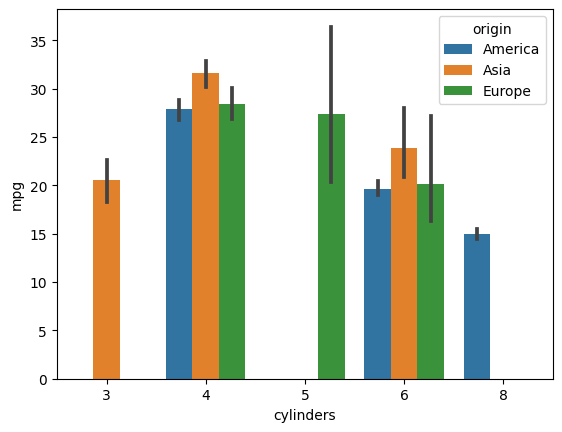

In [27]:
sns.barplot(x='cylinders', y='mpg', hue='origin', data=df)
plt.show()


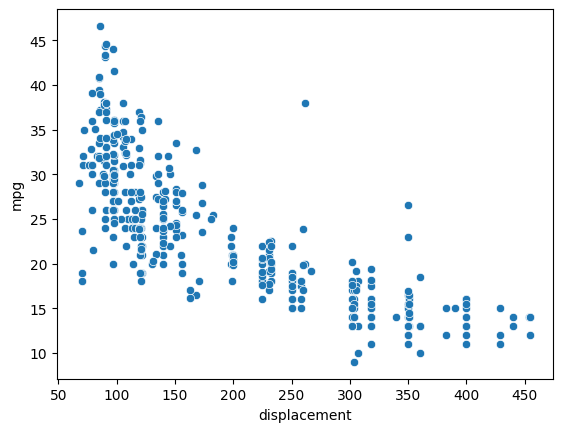

In [28]:
sns.scatterplot(x='displacement', y='mpg', data=df)
plt.show()

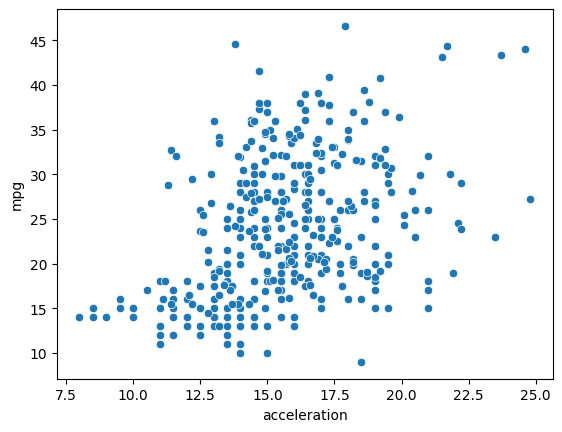

In [29]:
sns.scatterplot(x='acceleration', y='mpg', data=df)
plt.show()

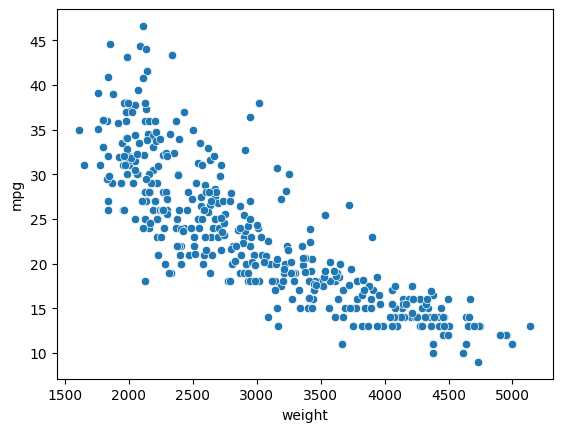

In [30]:
sns.scatterplot(x='weight', y='mpg', data=df)
plt.show()

<Axes: xlabel='weight', ylabel='mpg'>

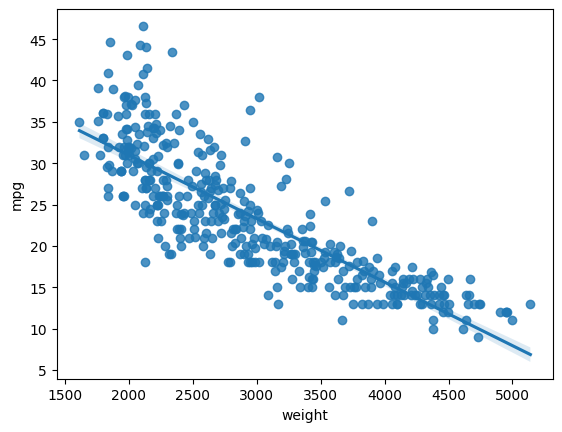

In [31]:
sns.regplot(x='weight', y='mpg', data=df)

<Axes: xlabel='weight', ylabel='mpg'>

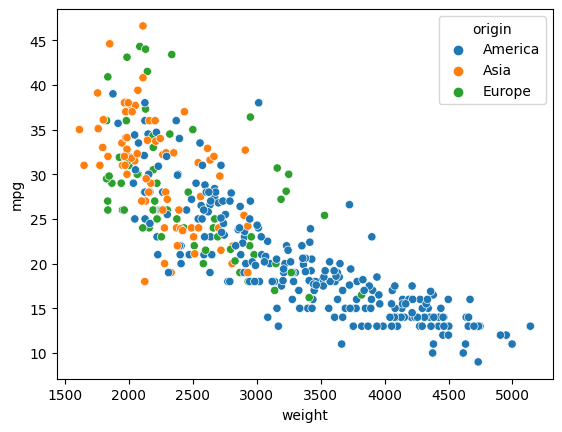

In [32]:
sns.scatterplot(x="weight", y="mpg", hue="origin", data=df)

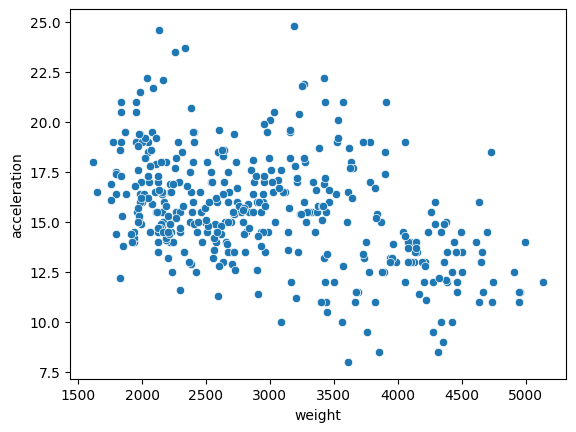

In [33]:
sns.scatterplot(x='weight', y='acceleration', data=df)
plt.show()

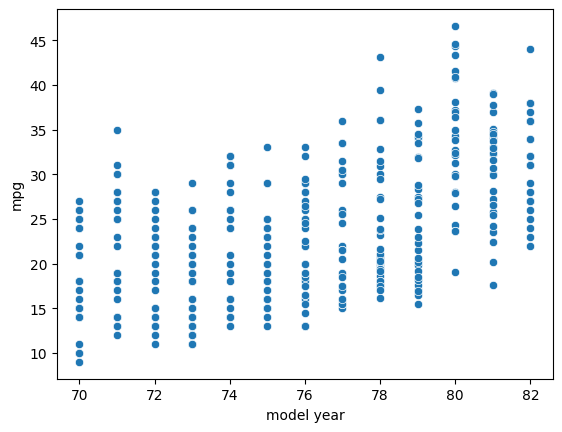

In [34]:
sns.scatterplot(x='model year', y='mpg', data=df)
plt.show()

<Axes: xlabel='acceleration', ylabel='displacement'>

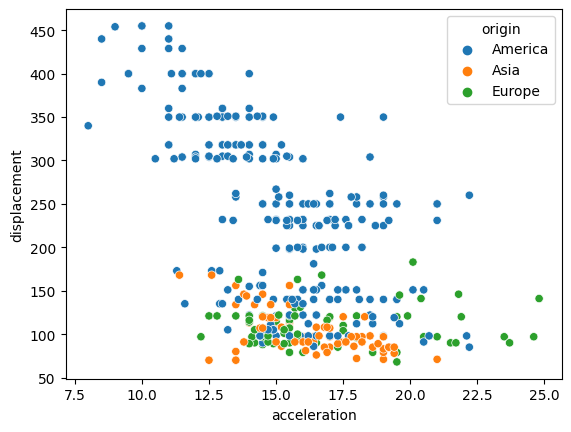

In [35]:
sns.scatterplot(x="acceleration", y="displacement", hue="origin", data=df)

<Axes: xlabel='acceleration', ylabel='weight'>

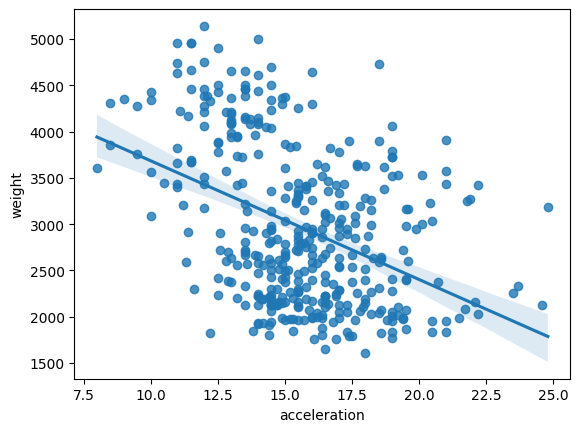

In [36]:
sns.regplot(x="acceleration", y="weight", data=df)

<Axes: xlabel='acceleration', ylabel='weight'>

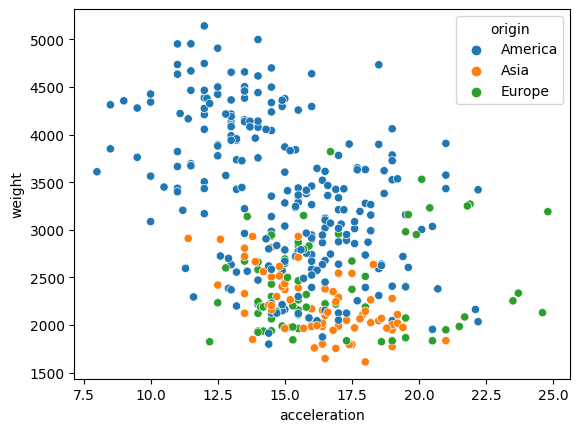

In [37]:
sns.scatterplot(x="acceleration", y="weight", hue="origin", data=df)

<Axes: xlabel='weight', ylabel='displacement'>

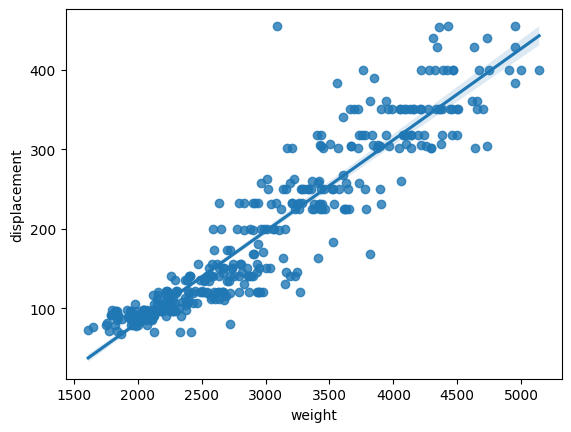

In [38]:
sns.regplot(x="weight", y="displacement", data=df)

<Axes: xlabel='weight', ylabel='displacement'>

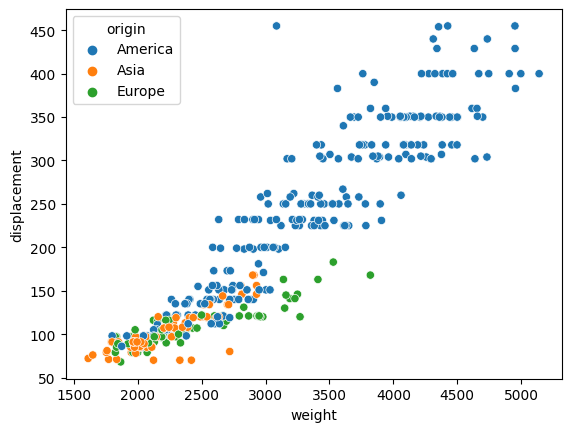

In [39]:
sns.scatterplot(x="weight", y="displacement", hue="origin", data=df)

<Axes: xlabel='acceleration', ylabel='displacement'>

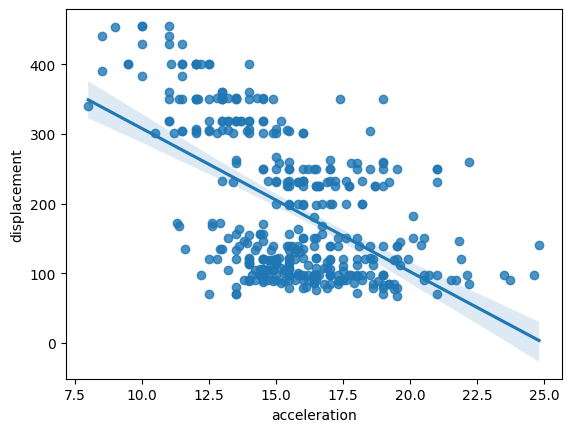

In [40]:
sns.regplot(x="acceleration", y="displacement", data=df)

<Axes: xlabel='acceleration', ylabel='displacement'>

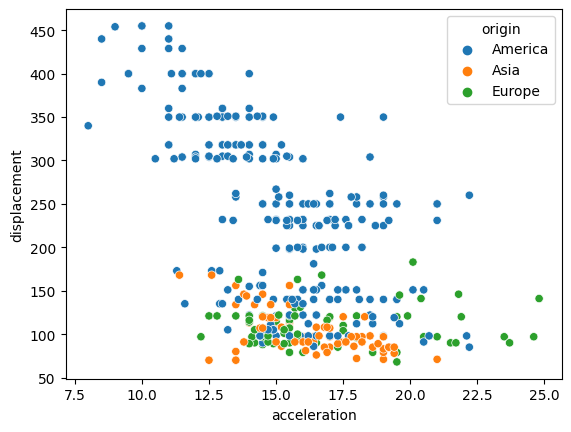

In [41]:
sns.scatterplot(x="acceleration", y="displacement", hue="origin", data=df)

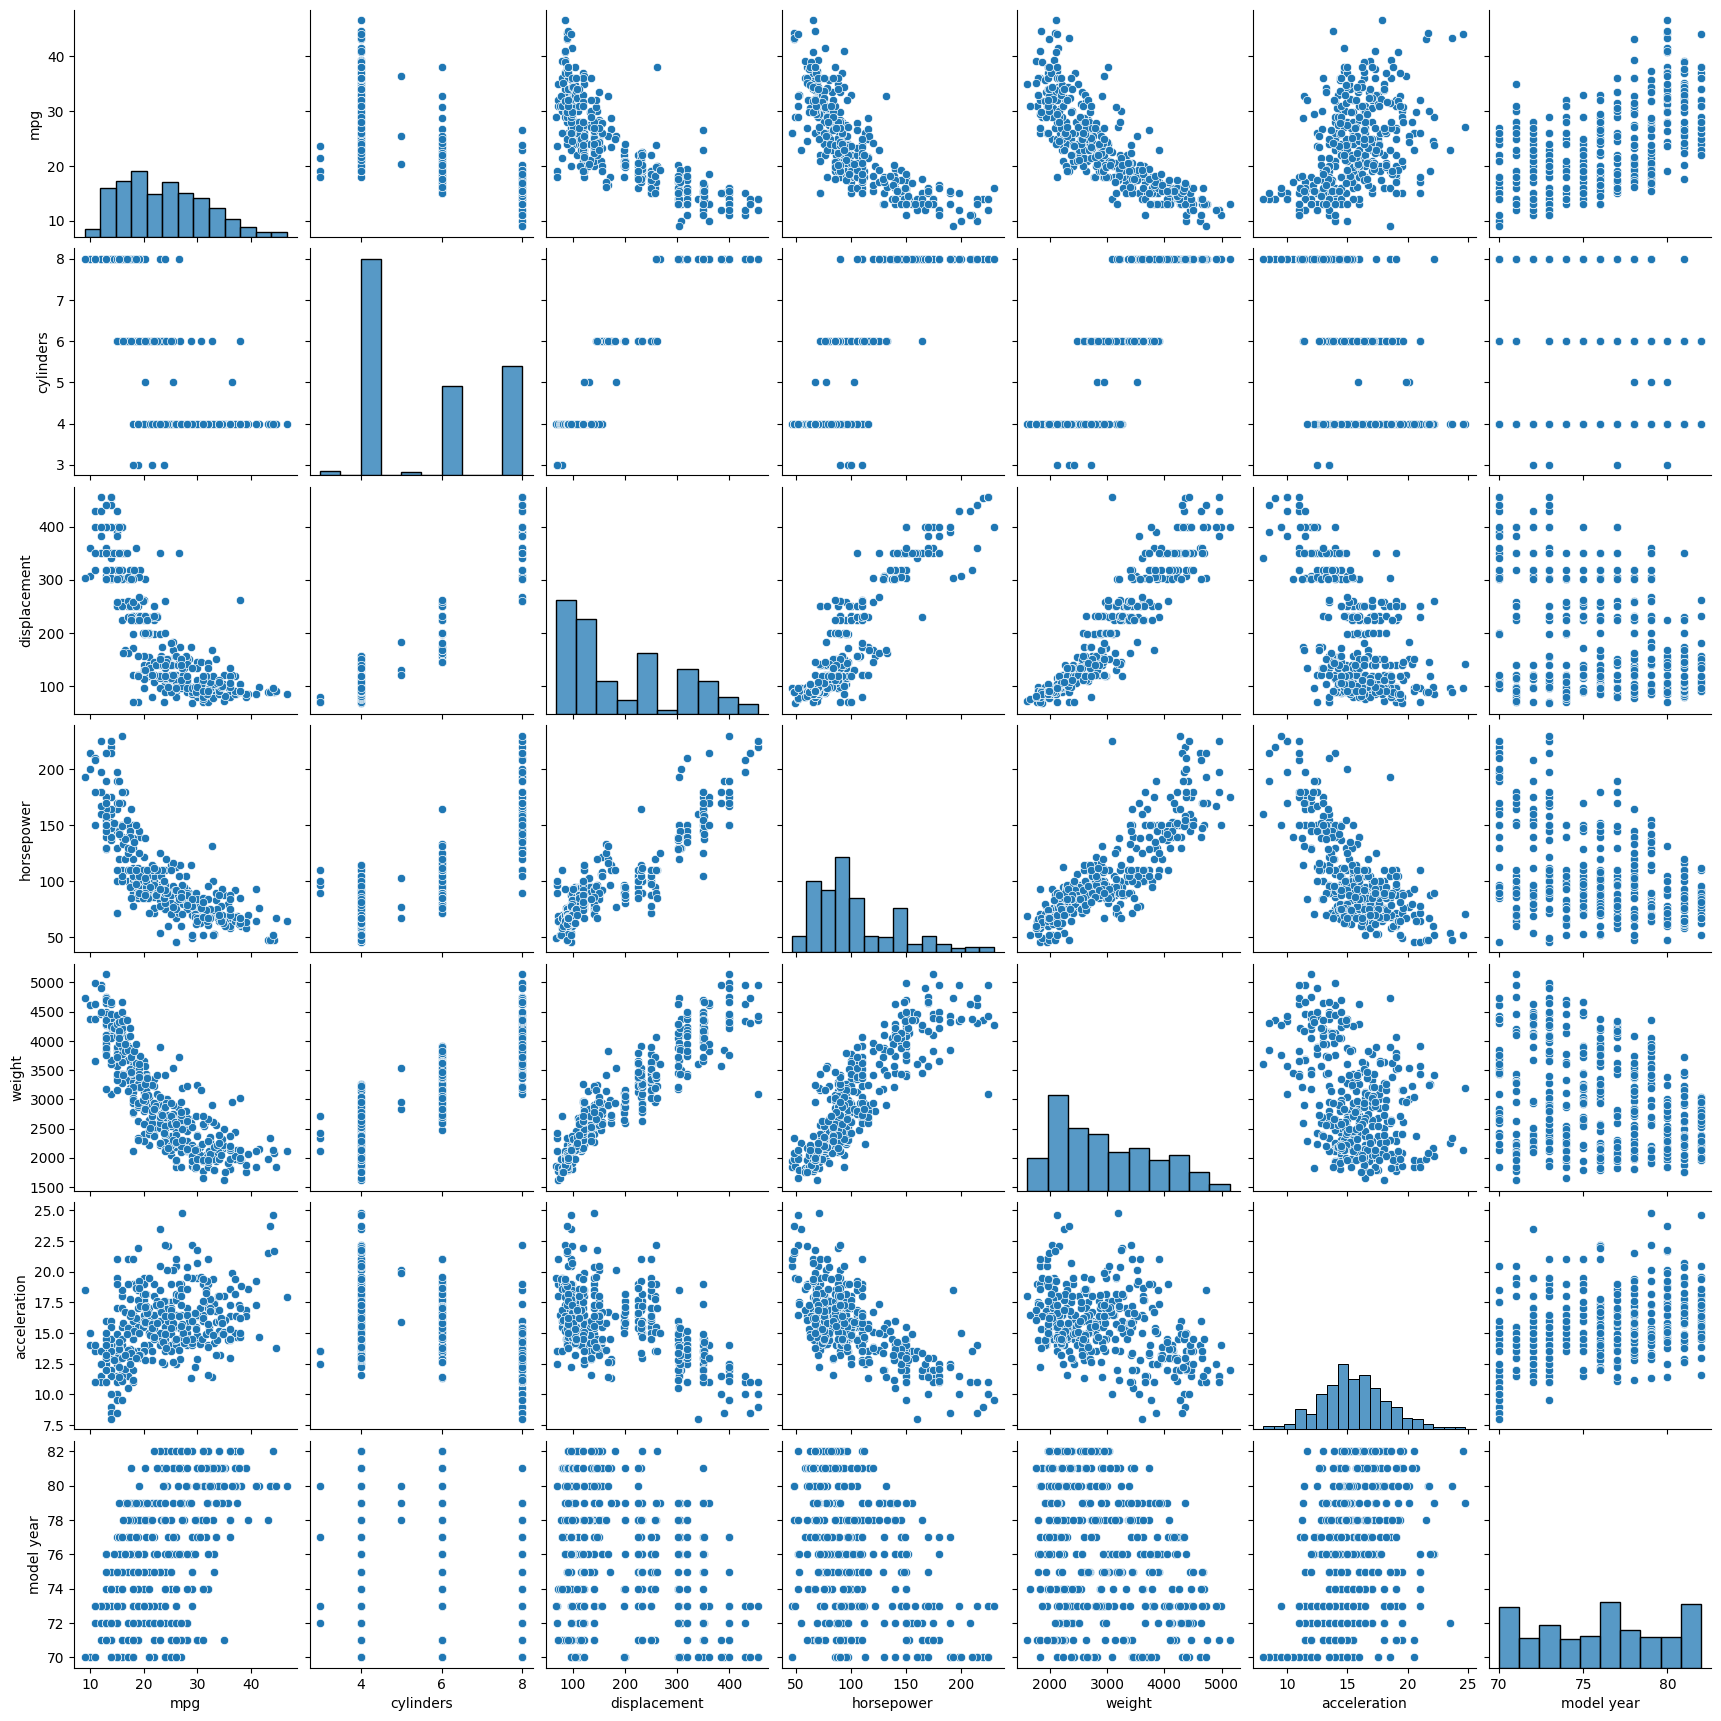

In [42]:
sns.pairplot(data=df)

plt.show()

In [43]:
corr = df.corr(numeric_only=True) #cylinders-displacement, mpg-weight

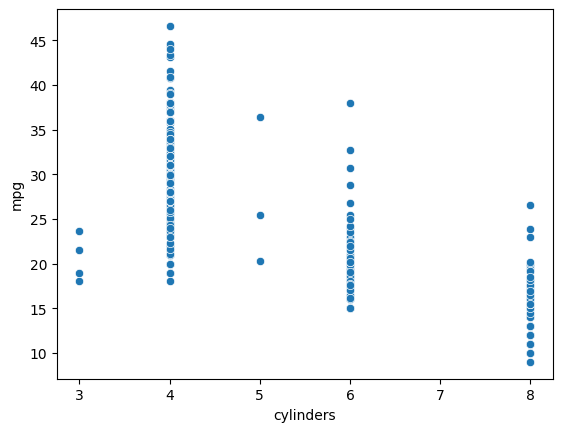

In [44]:
sns.scatterplot(x='cylinders', y='mpg', data=df)
plt.show()

<Axes: >

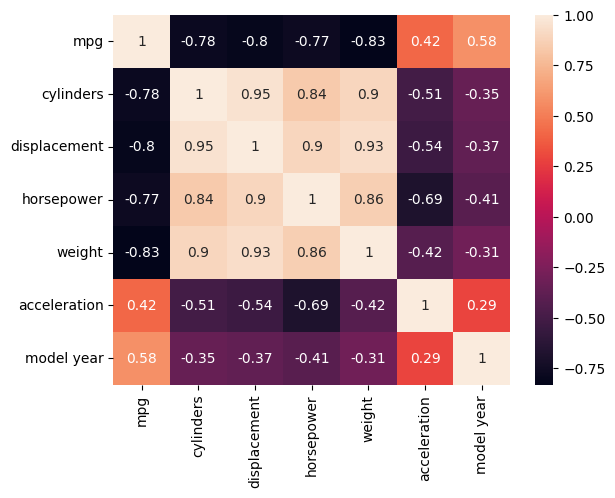

In [45]:
sns.heatmap(corr, annot=True)
# Heatmap can give visually to view the colums corrlative inverse/directly proportional

In [46]:
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000


In [47]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [48]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [49]:
df = pd.get_dummies(df, columns=["origin"])

In [50]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
79,26.0,4,96.0,69.0,2189,18.0,72,False,False,True
355,33.7,4,107.0,75.0,2210,14.4,81,False,True,False
42,12.0,8,383.0,180.0,4955,11.5,71,True,False,False
198,33.0,4,91.0,53.0,1795,17.4,76,False,True,False
37,18.0,6,232.0,100.0,3288,15.5,71,True,False,False
104,12.0,8,400.0,167.0,4906,12.5,73,True,False,False
122,24.0,4,121.0,110.0,2660,14.0,73,False,False,True
30,28.0,4,140.0,90.0,2264,15.5,71,True,False,False
31,25.0,4,113.0,95.0,2228,14.0,71,False,True,False
351,34.4,4,98.0,65.0,2045,16.2,81,True,False,False


In [51]:
# Model building
X = df.drop(["mpg"], axis=1)

In [52]:
Y = df["mpg"]

In [53]:
df[["mpg"]]

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
5,15.0
6,14.0
7,14.0
8,14.0
9,15.0


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30,random_state=1)

In [55]:
model_lr = LinearRegression()

In [56]:
model_lr.fit(X_train, Y_train)

LinearRegression()

In [57]:
model_lr.score(X_train,Y_train)

0.8141025501610559

In [58]:
model_lr.score(X_test, Y_test)

0.8433135132808827

In [59]:
# without the Randomm state: 1

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30,random_state=2)

In [60]:
model_lr.fit(X_train, Y_train)

LinearRegression()

In [61]:
print(model_lr.score(X_train,Y_train))
print(model_lr.score(X_test, Y_test))

0.8195425758249515
0.8254870925859883


In [62]:
# without the Randomm state: 5
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30,random_state=5)
model_lr.fit(X_train, Y_train)
print(model_lr.score(X_train,Y_train))
print(model_lr.score(X_test, Y_test))

0.8411816443315627
0.7670485293494346


In [63]:
# without the Randomm state
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30, random_state=1)
model_lr.fit(X_train, Y_train)
print("Train:: ", model_lr.score(X_train,Y_train))
print("Test:: ", model_lr.score(X_test, Y_test))

Train::  0.8141025501610559
Test::  0.8433135132808827


In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y,test_size=.30)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30,random_state=1)

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

print(y_pred)

[21.27290228 30.83386707 17.19325748 23.67685263 23.46701615 16.2439221
 32.45356785 37.22411911 17.15147068 13.33416331 31.17486812 18.14025751
 20.47717772 24.6384317  40.36462483 20.87551576 13.1152066  19.30251481
 12.56166823 35.66134349 22.83000501 32.39701749 19.26880817 24.82031235
 22.48097304 30.38471507 33.32483815 34.78765208 16.40369189 31.52014844
 23.05587523 13.78644849 18.27729015 26.03355774 24.92977771 14.0560002
 26.85889061 11.55844849 34.78491959 24.08041301 25.88822001 24.22553256
 18.07672355 34.28694212 23.08612102 21.10934311 19.33392619 14.13188523
 27.7516897  17.92430462 23.84940378 25.62709384 16.51424806 14.03044133
 29.99797767 23.66375381 12.47803122 13.7717818  31.61230105 38.15233234
 37.66126044 38.5205202  16.69919232 23.61974575 17.65925919 33.86476177
 23.82748675 25.54168947 30.73337105 14.14905082 18.35704793 23.42957053
 16.87966424 27.55653808 14.33511302 29.12408459 30.38260511 16.45075908
 15.41051842 23.47202677 18.71617502 15.97552262 39.1

In [65]:
poly_clf.score(X_train2, Y_train)

0.8995492105454684

In [66]:
poly_clf.score(X_test2, Y_test)

0.8613490753077124

In [67]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)


In [68]:
print("Train:: ", poly_clf.score(X_train2, Y_train))
print("Test:: ", poly_clf.score(X_test2, Y_test))

Train::  0.8995492105454684
Test::  0.8613490753077124


In [69]:
poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

print("Train:: ", poly_clf.score(X_train2, Y_train))
print("Test:: ", poly_clf.score(X_test2, Y_test))

Train::  0.91864210846251
Test::  0.5122892416204305


In [70]:
poly = PolynomialFeatures(degree=4, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

print("Train:: ", poly_clf.score(X_train2, Y_train))
print("Test:: ", poly_clf.score(X_test2, Y_test))

Train::  0.9611876239148242
Test::  -57.793542943910474


In [71]:
poly = PolynomialFeatures(degree=5, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

print("Train:: ", poly_clf.score(X_train2, Y_train))
print("Test:: ", poly_clf.score(X_test2, Y_test))

Train::  0.9621674229851374
Test::  -33319990722.582462


In [72]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

print("Train:: ", poly_clf.score(X_train2, Y_train))
print("Test:: ", poly_clf.score(X_test2, Y_test))

Train::  0.8995492105454684
Test::  0.8613490753077124


In [105]:
df.dtypes

mpg               float64
cylinders         float64
displacement      float64
horsepower        float64
weight            float64
acceleration      float64
model year        float64
origin_America       bool
origin_Asia          bool
origin_Europe        bool
dtype: object

In [74]:
numeric_columns = df.select_dtypes(include='number')
numeric_columns

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
5,15.0,8,429.0,198.0,4341,10.0,70
6,14.0,8,454.0,220.0,4354,9.0,70
7,14.0,8,440.0,215.0,4312,8.5,70
8,14.0,8,455.0,225.0,4425,10.0,70
9,15.0,8,390.0,190.0,3850,8.5,70


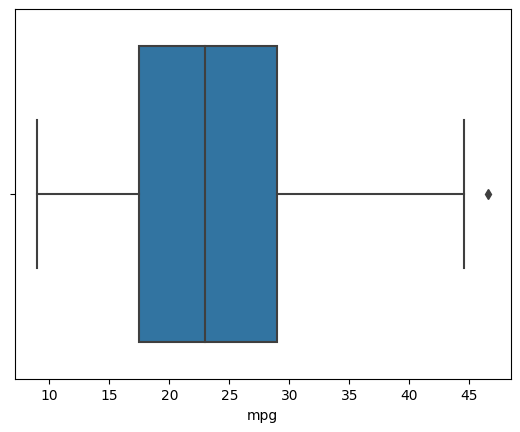

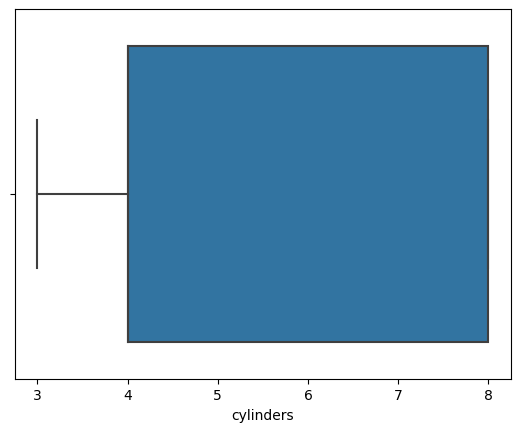

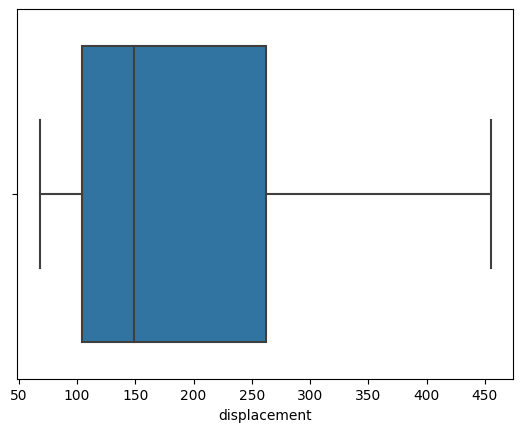

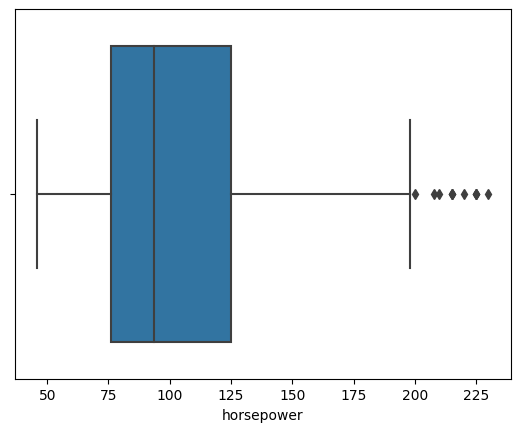

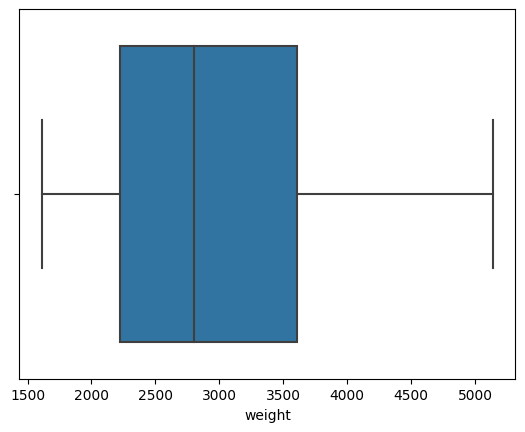

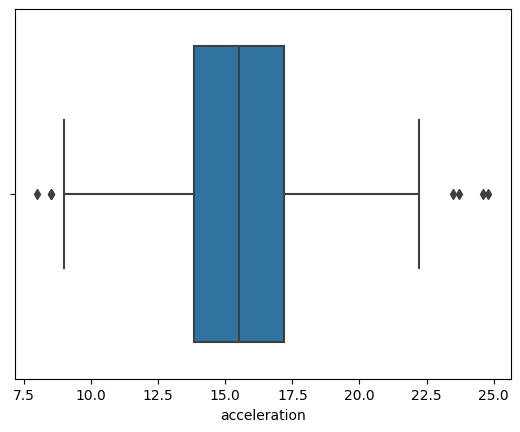

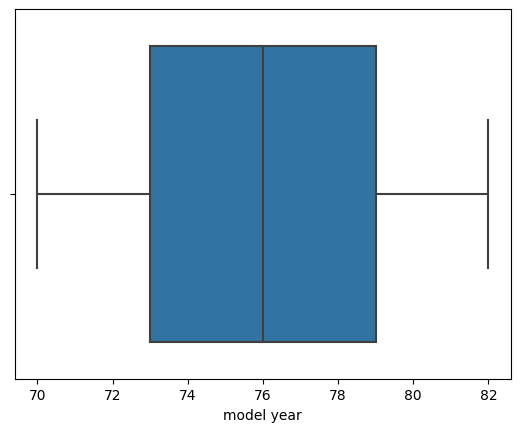

In [75]:
for col in numeric_columns:
    sns.boxplot(x=col, data=df)
    plt.show()

In [76]:

def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-1.5*IQR
    higher_range = Q3+1.5*IQR
    return lower_range, higher_range

outliers_columns = ["mpg", "horsepower", "acceleration"]

cleaned_df = df
for outlier_col in outliers_columns:
    lower, upper = remove_outlier(df[outlier_col])
    cleaned_df[outlier_col] = np.where(cleaned_df[outlier_col]>upper, upper, cleaned_df[outlier_col])
    cleaned_df[outlier_col] = np.where(cleaned_df[outlier_col]<lower, lower, cleaned_df[outlier_col])
    
cleaned_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
196,24.5,4,98.0,60.0,2164,22.1,76,True,False,False
27,11.0,8,318.0,198.5,4382,13.5,70,True,False,False
223,15.5,8,318.0,145.0,4140,13.7,77,True,False,False
214,13.0,8,302.0,130.0,3870,15.0,76,True,False,False
187,17.5,8,305.0,140.0,4215,13.0,76,True,False,False


In [77]:
Y=cleaned_df["mpg"]
X =cleaned_df.drop(["mpg"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30, random_state=1)

model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)
print("Train:: ", model_lr.score(X_train,Y_train))
print("Test:: ", model_lr.score(X_test, Y_test))

Train::  0.8155527471646685
Test::  0.8415417614056202


In [78]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

print("Train:: ", poly_clf.score(X_train2, Y_train))
print("Test:: ", poly_clf.score(X_test2, Y_test))

Train::  0.8982066496382052
Test::  0.8591440324975103


In [79]:
cleaned_df.skew()

mpg               0.454934
cylinders         0.526922
displacement      0.719645
horsepower        0.935495
weight            0.531063
acceleration      0.163862
model year        0.011535
origin_America   -0.521133
origin_Asia       1.517553
origin_Europe     1.709131
dtype: float64

In [80]:
df.skew()

mpg               0.454934
cylinders         0.526922
displacement      0.719645
horsepower        0.935495
weight            0.531063
acceleration      0.163862
model year        0.011535
origin_America   -0.521133
origin_Asia       1.517553
origin_Europe     1.709131
dtype: float64

In [83]:
# Approach1 Linear with outlier
# Approach2 Linear without outlier
# Approach3 Poly with outlier
# Approach4 Poly without outlier
# Approach5 Standarization
# Approach6 Normalization

from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()

In [84]:
# implement 

df["mpg"] = std_scale.fit_transform(df[["mpg"]])


Y=df["mpg"]
X =df.drop(["mpg"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30,random_state=1)

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2, Y_test)


print("Train:: ", poly_clf.score(X_train2, Y_train))
print("Test:: ", poly_clf.score(X_test2, Y_test))

TypeError: LinearModel.predict() takes 2 positional arguments but 3 were given

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
# Standardization Approach
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()


df["cylinders"] = std_scale.fit_transform(df[["cylinders"]])

df["displacement"] = std_scale.fit_transform(df[["displacement"]])

df["horsepower"] = std_scale.fit_transform(df[["horsepower"]])

df["weight"] = std_scale.fit_transform(df[["weight"]])

df["acceleration"] = std_scale.fit_transform(df[["acceleration"]])

df["model year"] = std_scale.fit_transform(df[["model year"]])

In [87]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
0,-0.706560,1.498191,1.090604,0.713692,0.630870,-1.320595,-1.627426,True,False,False
1,-1.090999,1.498191,1.503514,1.666741,0.854333,-1.506489,-1.627426,True,False,False
2,-0.706560,1.498191,1.196232,1.258291,0.550470,-1.692383,-1.627426,True,False,False
3,-0.962852,1.498191,1.061796,1.258291,0.546923,-1.320595,-1.627426,True,False,False
4,-0.834706,1.498191,1.042591,0.985992,0.565841,-1.878278,-1.627426,True,False,False


In [88]:
# Decide between X and Y axis, Y axis will always be the dependent variable
X = df.drop(["mpg"], axis = 1)
Y = df[["mpg"]]

In [89]:
# Split the train and test data (Usually 70-30, can choose 75-25, 80,20, 85,15)
# random_state is never to be used in real life scenario (This is only for class purpose)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [90]:
# Instantiate the model
model_lr = LinearRegression()

In [91]:
# Fit the model with the train data
model_lr.fit(X_train, Y_train)

LinearRegression()

In [92]:
model_lr.score(X_train, Y_train)

0.8155527471646684

In [93]:
model_lr.score(X_test, Y_test)

0.8415417614056212

In [94]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Degree can be varied to play around and check when model is over fitting
# poly = PolynomialFeatures(degree = 1, interaction_only = True)
poly = PolynomialFeatures(degree = 2, interaction_only = True)
# poly = PolynomialFeatures(degree = 3, interaction_only = True)
# poly = PolynomialFeatures(degree = 4, interaction_only = True)

X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

In [95]:
print(poly_clf.score(X_train2, Y_train))

print(poly_clf.score(X_test2, Y_test))

0.9034698975823044
0.8657945764108772


In [96]:
# Without outliers

std_cleaned_df = cleaned_df

# Standardization Approach
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()


std_cleaned_df["cylinders"] = std_scale.fit_transform(std_cleaned_df[["cylinders"]])

std_cleaned_df["displacement"] = std_scale.fit_transform(std_cleaned_df[["displacement"]])

std_cleaned_df["horsepower"] = std_scale.fit_transform(std_cleaned_df[["horsepower"]])

std_cleaned_df["weight"] = std_scale.fit_transform(std_cleaned_df[["weight"]])

std_cleaned_df["acceleration"] = std_scale.fit_transform(std_cleaned_df[["acceleration"]])

std_cleaned_df["model year"] = std_scale.fit_transform(std_cleaned_df[["model year"]])


Y = std_cleaned_df[["mpg"]]
X = std_cleaned_df.drop(["mpg"], axis = 1)


In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [98]:
# Instantiate the model
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)
# Fit the model with the train data
print("Linear std + removed outliers")
print("Test::", model_lr.score(X_test, Y_test))
print("Train::", model_lr.score(X_train, Y_train))

Linear std + removed outliers
Test:: 0.8415417614056212
Train:: 0.8155527471646684


In [99]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Degree can be varied to play around and check when model is over fitting
# poly = PolynomialFeatures(degree = 1, interaction_only = True)
poly = PolynomialFeatures(degree = 2, interaction_only = True)
# poly = PolynomialFeatures(degree = 3, interaction_only = True)
# poly = PolynomialFeatures(degree = 4, interaction_only = True)

X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

In [100]:
print("Polynomial + removed outliers + standarization")
print("Train: ", poly_clf.score(X_train2, Y_train))
print("Test: ", poly_clf.score(X_test2, Y_test))

Polynomial + removed outliers + standarization
Train:  0.9034698975823044
Test:  0.8657945764108772


In [101]:
from sklearn.preprocessing import MinMaxScaler
min_max_scale = MinMaxScaler()


min_max_cleaned_df = cleaned_df

min_max_cleaned_df["cylinders"] = min_max_scale.fit_transform(min_max_cleaned_df[["cylinders"]])

min_max_cleaned_df["displacement"] = min_max_scale.fit_transform(min_max_cleaned_df[["displacement"]])

min_max_cleaned_df["horsepower"] = min_max_scale.fit_transform(min_max_cleaned_df[["horsepower"]])

min_max_cleaned_df["weight"] = min_max_scale.fit_transform(min_max_cleaned_df[["weight"]])

min_max_cleaned_df["acceleration"] = min_max_scale.fit_transform(min_max_cleaned_df[["acceleration"]])

min_max_cleaned_df["model year"] = min_max_scale.fit_transform(min_max_cleaned_df[["model year"]])


Y = min_max_cleaned_df[["mpg"]]
X = min_max_cleaned_df.drop(["mpg"], axis = 1)


In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

# Instantiate the model
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)
# Fit the model with the train data
print("Linear + removed outliers + Normalization")
print("Test::", model_lr.score(X_test, Y_test))
print("Train::", model_lr.score(X_train, Y_train))

Linear + removed outliers + Normalization
Test:: 0.841541761405621
Train:: 0.8155527471646684


In [103]:

# Degree can be varied to play around and check when model is over fitting
# poly = PolynomialFeatures(degree = 1, interaction_only = True)
poly = PolynomialFeatures(degree = 2, interaction_only = True)
# poly = PolynomialFeatures(degree = 3, interaction_only = True)
# poly = PolynomialFeatures(degree = 4, interaction_only = True)

X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

In [104]:
print("Polynomial + removed outliers + Normalization")
print("Train: ", poly_clf.score(X_train2, Y_train))
print("Test: ", poly_clf.score(X_test2, Y_test))

Polynomial + removed outliers + Normalization
Train:  0.8921299757610678
Test:  0.8399111751166626


In [106]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import KNN
from sklearn.neighbors import KNeighborsClassifier

In [107]:
model_knn = KNeighborsClassifier()

In [ ]:
Y=df["mpg"]
X=df.drop("mpg", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)
